# freqdemod-quickstart-1

### Author information

John A. Marohn (jam99@cornell.edu)  
Department of Chemistry and Chemical Biology  
Cornell University  
Ithaca, NY USA; 14853-1301

### Date

2014/11/23.  Revised 2023/05/08.

### Abstract

Create a sine wave with noise and demodulate it to obtains the sine wave's frequency.

# Preliminaries

So we can import the package in the usual way, use ``setup.py`` development mode.  Here we are following directions [here](https://pythonhosted.org/setuptools/setuptools.html#development-mode).  In the base directory, run: 

    python setup.py develop
    
We should now be able to import parts of the package in the usual way using an import statement

In [1]:
import freqdemod as fd
from freqdemod.demodulate import Signal

In [2]:
from freqdemod import Signal

Execute the the first line below if you want the plots to show inline.  If instead you want each plot to display in a separate pop-up window, then don't execute the first line.  Set up plotting defaults so the plots will look nice inline: 

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)
plt.rcParams['figure.figsize'] = 8, 6

## Create a test signal

The test signal is a sine wave with noise added.

In [4]:
fd = 50.0e3    # digitization frequency
f0 = 2.00e3    # signal frequency
nt = 60e3      # number of signal points    
sn = 1.0       # signal zero-to-peak amplitude
sn_rms = 0.01  # noise rms amplitude

dt = 1 / fd
t = dt * np.arange(nt)
signal = sn * np.sin(2*np.pi*f0*t) + np.random.normal(0, sn_rms, t.size)

Plot the test signal

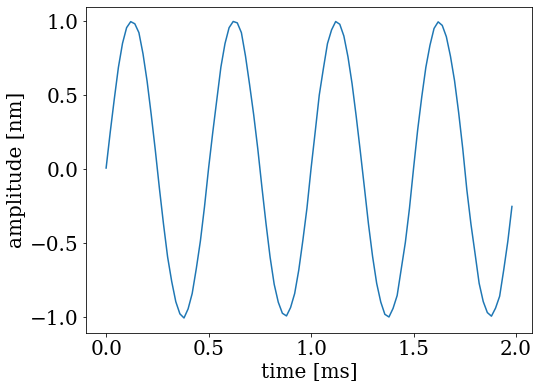

In [5]:
plt.plot(1E3*t[0:100], signal[0:100])
plt.xlabel('time [ms]')
plt.ylabel('amplitude [nm]')
plt.show()

## Load the test signal into a Signal object

### Create an instance of the Signal object


In [6]:
s = Signal()     # Create a signal
s.load_nparray(signal,"x","nm",dt)   # Load the data into the file

### Process the Signal object

Open the Signal file and process it.

In [7]:
s.time_mask_binarate("middle")  # Pull out the middle section
s.time_window_cyclicize(3E-3)   # Force the data to start and end at zero
s.fft()                         # Fourier transform the data
s.freq_filter_Hilbert_complex() # Take the complex Hilbert transform
s.freq_filter_bp(1.00)          # Apply a 1 kHz wide bandpass filter
s.time_mask_rippleless(15E-3)   # Set up a filter to remove ripple
s.ifft()                        # Inverse Fourier transform the data
s.fit_phase(221.34E-6)          # Fit the phase vs time data

### Plot the intermediate results

Decide wheter to plot using LaTeX axes labels.  Using ``latex=True`` may make plotting very slow, so I suggest using ``latex=False`` to start.

In [8]:
latex = False

Begin by re-plotting the data

ValueError: 2 indexing arguments for 1 dimensions

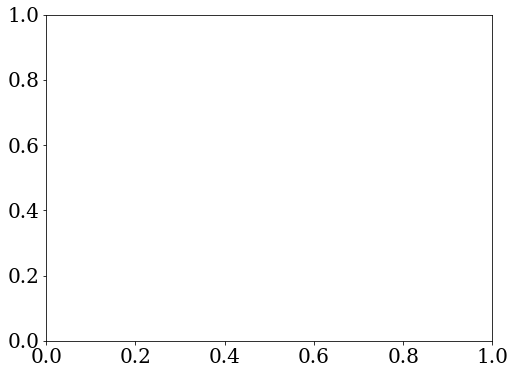

In [9]:
s.plot('y', LaTeX=latex)

Plot the intermediate results

In [ ]:
s.plot('workup/time/mask/binarate', LaTeX=latex)

In [ ]:
s.plot('workup/time/window/cyclicize', LaTeX=latex) 

In [ ]:
s.plot('workup/freq/FT', LaTeX=latex, component='abs')

In [ ]:
s.plot('workup/freq/filter/Hc', LaTeX=latex)

In [ ]:
s.plot('workup/freq/filter/bp', LaTeX=latex)

In [ ]:
s.plot('workup/time/mask/rippleless', LaTeX=latex)

### Summarize the data workup

The signal object creates a comment which summarizes the data workup.  Print out this comment.

In [ ]:
print(s)

### Plot the primary results

... including the complex signal, the amplitude, the phase, and the frequency.

In [ ]:
s.plot('workup/time/z', LaTeX=latex, component='both')

In [ ]:
s.plot('workup/time/a', LaTeX=latex)

In [ ]:
s.plot('workup/time/p', LaTeX=latex)

In [ ]:
s.plot('workup/fit/y', LaTeX=latex)

## Explore the Signal object

In [ ]:
s.list()

## Clean up

Close the signal file.

In [ ]:
s.close()